In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Test for linear case

In [4]:
a = np.arange(4)
r = np.linspace(0, 1, 21)

In [5]:
q = np.quantile(a, r, interpolation='linear')

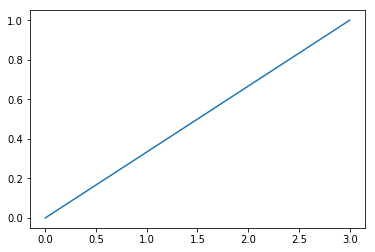

In [7]:
fig, ax = plt.subplots()
ax.plot(q, r)

# Test for discrete array

In [58]:
# f = np.array([2, 1, 3, 4.5])
# x_arr = np.array([-1,0,1,2])

x_arr = np.linspace(-2, 5, 30)
f = np.exp(-x_arr*x_arr) + 0.5 * np.exp(-3*(x_arr-3)*(x_arr-3))

mid_arr = 0.5 * (f[1:] + f[:-1])

norm = np.sum(mid_arr * np.diff(x_arr))

pdf = mid_arr / norm

cdf = np.empty(x_arr.size)

cdf[0] = 0.0
cdf[1:] = pdf * np.diff(x_arr)
cdf = np.add.accumulate(cdf)

In [59]:
q_arr = np.linspace(0.1, 0.9, 9)
xq_arr = np.empty_like(q_arr)
for i in range(q_arr.size):
    q0 = q_arr[i]
    if q0 == 1.0: raise Exception("the value is 1.0")

    ind = np.where((cdf - q0) > 0)[0][0] - 1
    x0 = ((q0 - cdf[ind]) * x_arr[ind+1] + (cdf[ind+1] - q0) * x_arr[ind]) / (cdf[ind+1]-cdf[ind])
    xq_arr[i] = x0

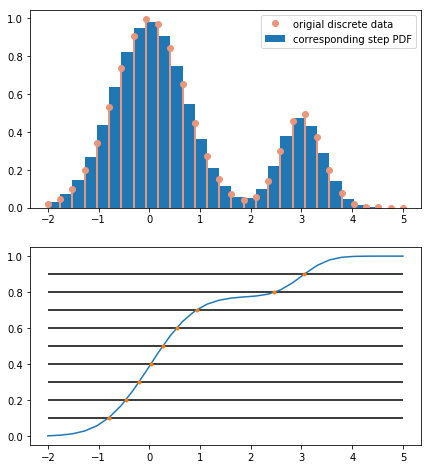

In [64]:
fig, (ax, axn) = plt.subplots(nrows=2, figsize=(7,8))

lf, = ax.plot(x_arr, f, 'o', color='darksalmon')
ax.vlines(x_arr, 0, f, linewidth=2.0, colors=lf.get_color())
baa = ax.bar(x_arr[:-1], mid_arr, align='edge', width=np.diff(x_arr))
ax.legend((lf, baa), ("origial discrete data", "corresponding step PDF"))

axn.plot(x_arr, cdf)
axn.plot(xq_arr, q_arr, '.')
axn.hlines(q_arr, x_arr[0], x_arr[-1])

In [61]:
# fig.savefig("data-to-cdf-two-gaussian-test-0.png")

# constant array

In [10]:
x_arr = np.arange(-3,6)
f = np.ones_like(x_arr) * 2
pdf = f / f.sum()
cdf = np.add.accumulate(pdf)

In [12]:
ratio_arr = np.linspace(0, 1, 11)

In [19]:
xq_arr = np.quantile(cdf, ratio_arr)

In [21]:
cdf

array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889, 1.        ])

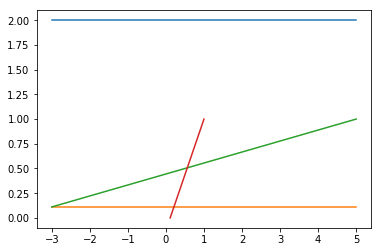

In [20]:
figp, axp = plt.subplots()
axp.plot(x_arr, f)
axp.plot(x_arr, pdf)
axp.plot(x_arr, cdf)
axp.plot(xq_arr, ratio_arr)